# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Probability theory
### VIDEO: Conditional probability
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## generate two long-spike time series

N = 10000
spikeDur = 10  # a.u. but must be an even number
spikeNumA = 0.01 # in proportion of total number of points
spikeNumB = 0.05 # in proportion of total number of points

# initialize to zeros
spike_tsA = np.zeros(N)
spike_tsB = np.zeros(N)

In [2]:
# populate time series A
# индексы центров пиков; значения [0, N-1), 
# количество - N умножить на желаемый процент
spiketimesA = np.random.randint(0, N, int(N*spikeNumA))

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesA)):
    
    # find boundaries
    bnd_pre = int(max(0, spiketimesA[spikei] - spikeDur/2))
    bnd_pst = int(min(N-1, spiketimesA[spikei] + spikeDur/2))
    
    # fill in with ones
    spike_tsA[bnd_pre:bnd_pst+1] = 1

In [3]:
# repeat for time series B
spiketimesB = np.random.randint(0, N, int(N*spikeNumB))
# spiketimesB[:len(spiketimesA)] = spiketimesA # induce strong conditional probability

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesB)):
    
    # find boundaries
    bnd_pre = int(max(0, spiketimesB[spikei] - spikeDur/2))
    bnd_pst = int(min(N-1, spiketimesB[spikei] + spikeDur/2))
    
    # fill in with ones
    spike_tsB[bnd_pre:bnd_pst+1] = 1

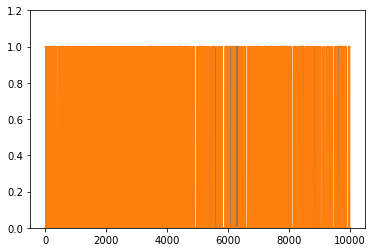

In [4]:
## let's see what they look like

plt.plot(range(N), spike_tsA, range(N), spike_tsB)
plt.ylim([0, 1.2])
# plt.xlim([2000,2500])
plt.show()

In [5]:
## compute their probabilities and intersection

# probabilities
probA = np.sum(spike_tsA == 1) / N
probB = np.mean(spike_tsB)
# Обе эти записи эквиваленты для текущего набора данных!

# joint probability
# Вероятность того, что произошли события А и Б
probAB = np.mean((spike_tsA + spike_tsB) == 2)
# эквивалентно:
# probAB = np.sum((spike_tsA + spike_tsB) == 2) / N

print(probA, probB, probAB)

0.1063 0.4267 0.0441


In [6]:
## compute the conditional probabilities

# p(A|B)
pAgivenB = probAB/probB

# p(B|A)
pBgivenA = probAB/probA

# print a little report
print('P(A) = %g'%probA)
print('P(A|B) = %g'%pAgivenB)
print('P(B) = %g'%probB)
print('P(B|A) = %g'%pBgivenA)

P(A) = 0.1063
P(A|B) = 0.103351
P(B) = 0.4267
P(B|A) = 0.414864
